## Plot the NARR Data Against WNV Incidence

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

### load WNV data

In [6]:
wnv = pd.read_csv('../data/wnv/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530_urban_counties.csv')
wnv = wnv.set_index('GEOID10', drop=True)

incidence = wnv.filter(like='NI_IR_', axis='columns')
incidence

,NI_IR_1999,NI_IR_2000,NI_IR_2001,NI_IR_2002,NI_IR_2003,NI_IR_2004,NI_IR_2005,NI_IR_2006,NI_IR_2007,NI_IR_2008,NI_IR_2009,NI_IR_2010,NI_IR_2011,NI_IR_2012,NI_IR_2013,NI_IR_2014,NI_IR_2015
GEOID10,,,,,,,,,,,,,,,,,
31109,0.0,0.0,0.0,3.482999,10.659885,0.377235,1.487719,0.734522,0.362303,0.357647,0.0,0.349478,0.000000,1.702962,3.025322,0.993059,1.308451
46099,0.0,0.0,0.0,0.000000,9.756732,1.284951,1.901406,3.112744,0.611333,0.000000,0.0,0.000000,0.000000,3.988740,0.557367,1.643331,0.000000
39003,0.0,0.0,0.0,2.764518,0.000000,0.000000,0.000000,1.874133,0.000000,0.000000,0.0,0.941575,0.000000,4.748564,0.000000,0.000000,0.000000
42007,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.592038
37037,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,0.0,0.0,0.0,0.271976,0.543721,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12015,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44003,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Refactor Data

Right now, the monthly data is in separate .csv files, this is hard to work with, so we will combine them into one .csv file.

Note that we are getting rid of the min and max data, only keeping the mean.

In [3]:
data_dir = '../data/narr/'
for dataset in ['rhum.2m_masked', 'air.sfc_masked', 'air.2m_masked', 'apcp_masked']:
    print(dataset)
    files = sorted(glob.glob(data_dir + dataset + '/*.csv'))
    
    # Use first file to create the base frame
    frame = pd.read_csv(files[0], index_col='GEOID')
    frame = frame[['NAME', 'mean']]
    
    date = files[0][files[0].rfind('/')+1:files[0].rfind('_')].split('_')
    year = date[0]
    month = date[1]
    frame = frame.rename(columns={'mean':year+'-'+month})
    
    
    for file in files[1:]:
        subframe = pd.read_csv(file, index_col='GEOID')
        subframe = subframe[['mean']]
        date = file[file.rfind('/')+1:file.rfind('_')].split('_')
        year = date[0]
        month = date[1]
        subframe = subframe.rename(columns={'mean':year+'-'+month})
        frame = frame.join(subframe)
        
    frame.to_csv('../data/narr/one_csv/' + dataset + '.csv')
    

rhum.2m_masked
air.sfc_masked
air.2m_masked
apcp_masked


### apcp (accumulated precipitation)

We will aggregate the data by each year, since the WNV IR data is yearly, not monthly.

In [111]:
apcp = pd.read_csv('../data/narr/one_csv/apcp_masked.csv', index_col='GEOID').drop('NAME', axis='columns')
apcp.columns = pd.to_datetime(apcp.columns)
apcp_yearly = apcp.resample('YS', axis='columns').sum()
print(apcp_yearly)

       1999-01-01  2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  \
GEOID                                                                           
31109   27.260852   21.580646   27.881599   19.799748   22.586191   23.101683   
46099   19.188721   20.085569   22.453970   17.043917   17.899135   19.648941   
39003   26.258801   32.244043   30.346136   27.310467   36.827314   31.412661   
42007   27.651739   28.092663   27.456427   27.943244   32.717626   38.203522   
37037   38.590932   33.768073   30.149360   35.996898   49.267839   33.719319   
...           ...         ...         ...         ...         ...         ...   
42129   29.927433   31.386995   28.375204   32.492206   39.403268   40.242092   
12015   40.703750   25.408790   36.653027   44.677633   47.333974   38.215194   
44003   35.403913   37.237460   31.465508   38.090009   40.392350   37.015175   
28089   37.289554   35.943621   48.700490   47.738086   45.784567   49.757573   
54099   28.285440   34.03537

#### Check that we summed yearly correctly

In [50]:
data = apcp.loc[31109][:12]
print(data)
print('SUM:', data.sum())

1999-01-01    0.453780
1999-02-01    0.871910
1999-03-01    0.784637
1999-04-01    5.047097
1999-05-01    5.482061
1999-06-01    5.402917
1999-07-01    3.140007
1999-08-01    3.062999
1999-09-01    1.719960
1999-10-01    0.057898
1999-11-01    0.775753
1999-12-01    0.461834
Name: 31109, dtype: float64
SUM: 27.260852287213005


#### The data was summed correctly, as seen when comparing the two data-frames
### Plot apcp_yearly

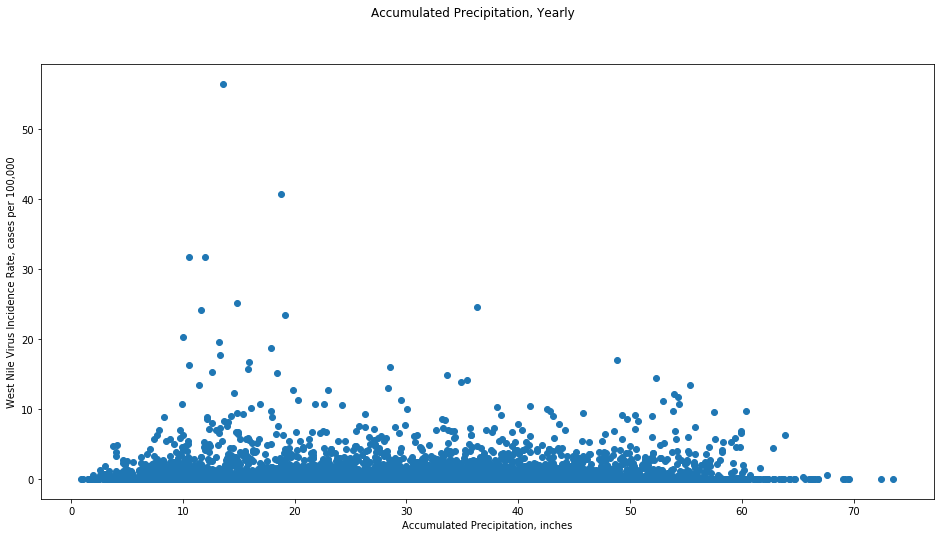

In [112]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('Accumulated Precipitation, Yearly')
ax.set_xlabel('Accumulated Precipitation, inches')
ax.set_ylabel('West Nile Virus Incidence Rate, cases per 100,000')

ax.scatter(apcp_yearly, incidence)
plt.show()

### air.sfc (surface air temperature)

In [113]:
air_sfc = pd.read_csv('../data/narr/one_csv/air.sfc_masked.csv', index_col='GEOID').drop('NAME', axis='columns')
air_sfc = air_sfc.apply(lambda x: x - 273.15)  # conversion to celsius
air_sfc = air_sfc.apply(lambda x: x * (9/5) + 32)
air_sfc.columns = pd.to_datetime(air_sfc.columns)
air_sfc = air_sfc.resample('YS', axis='columns').mean()
print('Mean:', air_sfc.mean().mean())

Mean: 57.87379617591816


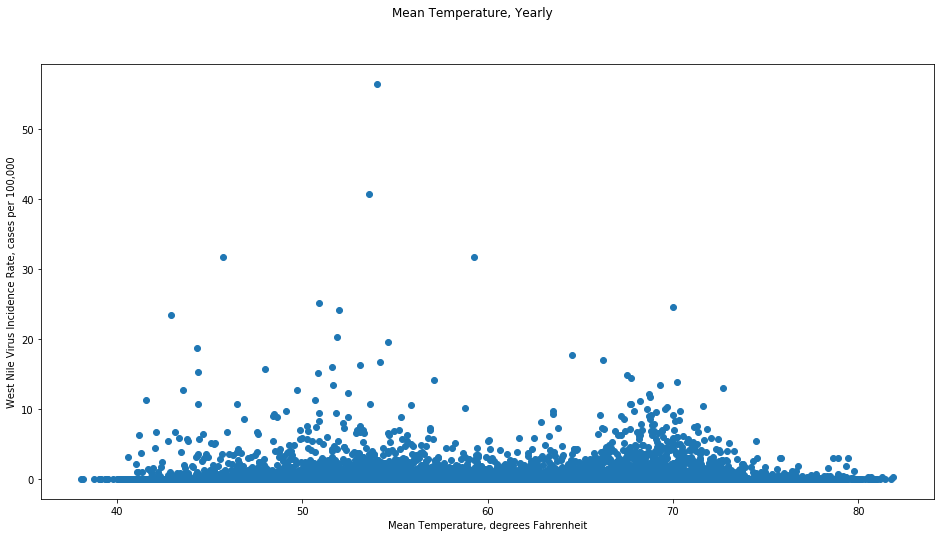

In [114]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('Mean Temperature, Yearly')
ax.set_xlabel('Mean Temperature, degrees Fahrenheit')
ax.set_ylabel('West Nile Virus Incidence Rate, cases per 100,000')

ax.scatter(air_sfc, incidence)
plt.show()

### air.2m (temperature at 2 meters above surface)

In [115]:
air_2m = pd.read_csv('../data/narr/one_csv/air.2m_masked.csv', index_col='GEOID').drop('NAME', axis='columns')
air_2m = air_2m.apply(lambda x: x - 273.15)  # conversion to celsius
air_2m = air_2m.apply(lambda x: x * (9/5) + 32)
air_2m.columns = pd.to_datetime(air_2m.columns)
air_2m = air_2m.resample('YS', axis='columns').mean()
print('Mean:', air_2m.mean().mean())


Mean: 56.70842482290213


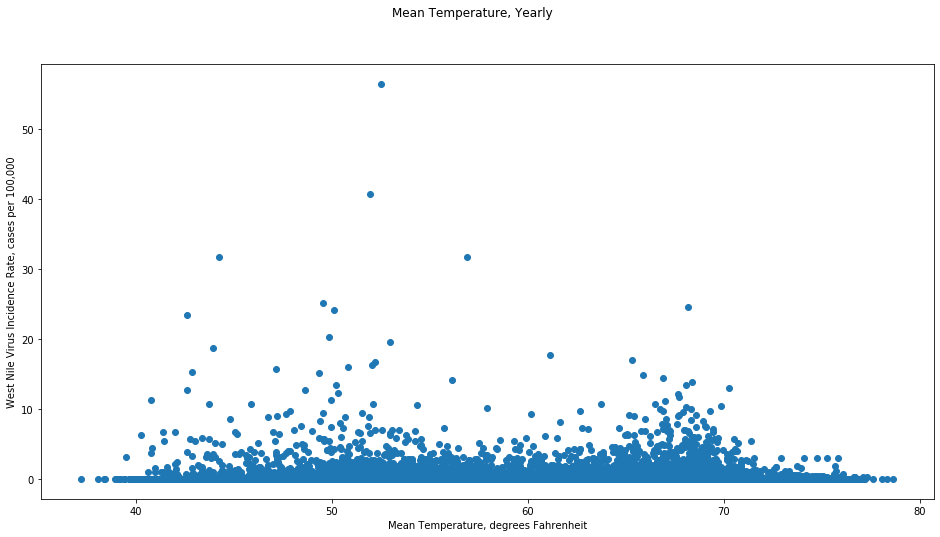

In [116]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('Mean Temperature, Yearly')
ax.set_xlabel('Mean Temperature, degrees Fahrenheit')
ax.set_ylabel('West Nile Virus Incidence Rate, cases per 100,000')

ax.scatter(air_2m, incidence)
plt.show()

### rhum.2m (relative humidity at 2 meters above surface)

In [117]:
rhum = pd.read_csv('../data/narr/one_csv/rhum.2m_masked.csv', index_col='GEOID').drop('NAME', axis='columns')
rhum.columns = pd.to_datetime(rhum.columns)

rhum_yearly = rhum.resample('YS', axis='columns').mean()

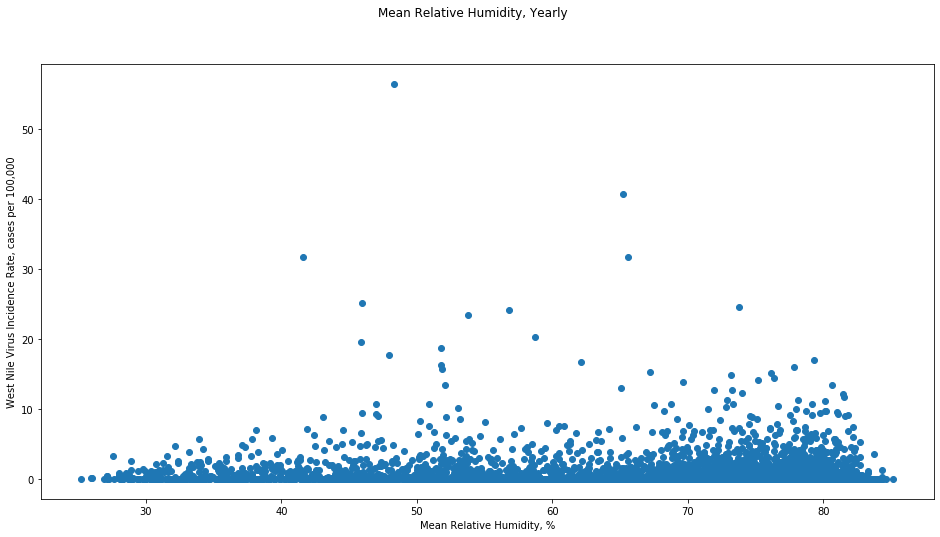

In [119]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('Mean Relative Humidity, Yearly')
ax.set_xlabel('Mean Relative Humidity, %')
ax.set_ylabel('West Nile Virus Incidence Rate, cases per 100,000')

ax.scatter(rhum_yearly, incidence)
plt.show()